In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.5.0


In [46]:
# Colab의 /머신러닝/content/gdrive 에 Google Drive 마운트 시킴

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
import os

working_dir='dataset'

# Google Drive에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'
original_dir = os.getcwd()  # save current dir

try:
    os.chdir(colab_default_dir) # Google Drive의 Colab 기본 디렉토리 이동

    if not os.path.exists(working_dir):
        os.mkdir(working_dir)

    os.chdir(working_dir)   # change working dir
    print('current dir = ', os.getcwd())

except Excption as err:
    os.chdir(original_dir)
    print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/dataset


In [48]:
import numpy as np

try:
    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')
    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print("x_data.shape =", x_data.shape)
    print("t_data.shape =", t_data.shape)

except Exception as err:
    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [49]:
# 모델 구축
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1], ), activation='sigmoid'))

In [50]:
# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 모델 학습
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)   # training data로 부터 20%비율로 validation data 생성 후 overfitting 확인

Epoch 1/500
19/19 - 0s - loss: 0.7190 - accuracy: 0.5239 - val_loss: 0.6956 - val_accuracy: 0.5066
Epoch 2/500
19/19 - 0s - loss: 0.7025 - accuracy: 0.5371 - val_loss: 0.6808 - val_accuracy: 0.5658
Epoch 3/500
19/19 - 0s - loss: 0.6888 - accuracy: 0.5552 - val_loss: 0.6686 - val_accuracy: 0.5855
Epoch 4/500
19/19 - 0s - loss: 0.6774 - accuracy: 0.5799 - val_loss: 0.6585 - val_accuracy: 0.5855
Epoch 5/500
19/19 - 0s - loss: 0.6678 - accuracy: 0.5931 - val_loss: 0.6500 - val_accuracy: 0.6184
Epoch 6/500
19/19 - 0s - loss: 0.6598 - accuracy: 0.6194 - val_loss: 0.6429 - val_accuracy: 0.6316
Epoch 7/500
19/19 - 0s - loss: 0.6530 - accuracy: 0.6194 - val_loss: 0.6369 - val_accuracy: 0.6513
Epoch 8/500
19/19 - 0s - loss: 0.6472 - accuracy: 0.6194 - val_loss: 0.6318 - val_accuracy: 0.6645
Epoch 9/500
19/19 - 0s - loss: 0.6423 - accuracy: 0.6277 - val_loss: 0.6275 - val_accuracy: 0.6776
Epoch 10/500
19/19 - 0s - loss: 0.6381 - accuracy: 0.6343 - val_loss: 0.6238 - val_accuracy: 0.6711
Epoch 11/

In [52]:
# 모델(정확도) 펻가
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7642


[0.48311999440193176, 0.7641633749008179]

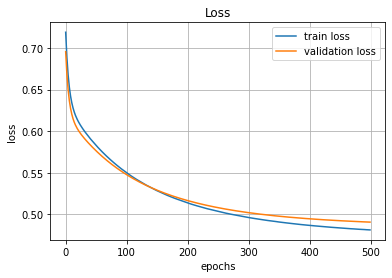

In [53]:
# 손실 및 모델 정확도
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

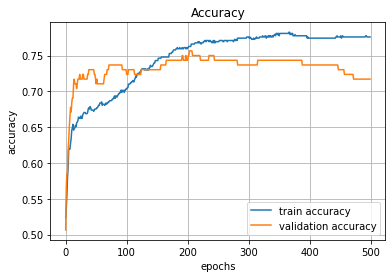

In [54]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()